## Equilibrium Price, Take 2


### Jan 2016

First we import some functionality from the scientific libraries

In [22]:
import numpy as np
from scipy.optimize import bisect

Now let's write routines to compute supply and demand as functions of price and parameters:

In [ ]:
def supply(price, b):
    return np.exp(b * price) - 1

def demand(price, a, epsilon):
    return a * price**(-epsilon)

Next we'll write a function that takes a parameter set and returns a market clearing price via bisection:

In [41]:
def compute_equilibrium(a, b, epsilon):
    plow = 0.1
    phigh = 10.0
    def excess_supply(price):
        return supply(price, b) - demand(price, a, epsilon)

    pclear = bisect(excess_supply, plow, phigh)
    return pclear

Let's test it with the original parameter set, the market clearing price for which was 2.9334.  The parameters are

$$ a = 1, \quad b = 0.1, \quad \epsilon = 1 $$

In [42]:
compute_equilibrium(1, 0.1, 1)

2.9334108855344145

Let's see this visually.  First we import the plotting library `matplotlib` in the standard way:

In [43]:
import matplotlib.pyplot as plt

The next command is a Jupyter "line magic" that tells Jupyter to display figures in the browser:

In [44]:
%matplotlib inline

Now let's plot supply and demand on a grid of points

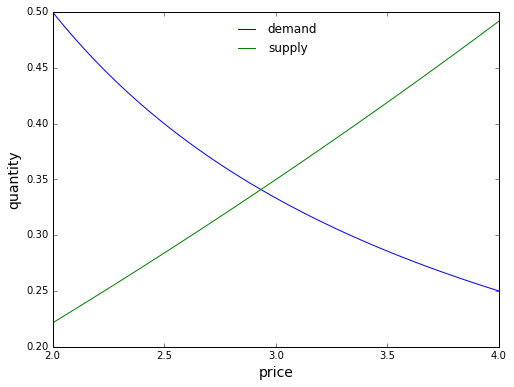

In [45]:
grid_size = 100
grid = np.linspace(2, 4, grid_size)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(grid, demand(grid, 1, 1), 'b-', label='demand')
ax.plot(grid, supply(grid, 0.1), 'g-', label='supply')
ax.set_xlabel('price', fontsize=14)
ax.set_ylabel('quantity', fontsize=14)
ax.legend(loc='upper center', frameon=False)

Now let's output market clearing prices for all parameter configurations given in exercise 1 of the homework.

In [46]:
parameter_list = [[1, 0.1, 1],
                  [2, 0.1, 1],
                  [1, 0.2, 1],
                  [1, 0.1, 2]]

for parameters in parameter_list:
    print("Price = {}".format(compute_equilibrium(*parameters)))

Price = 2.9334108855344145
Price = 4.029893774711271
Price = 2.0149468873557748
Price = 2.0797854211141553
